# Overview

This notebook provides an overview on how to get started with natural language processing tasks

## 1. What is NLP?

Natural language processing (NLP) is the analysis of written text.  It is a subfield of linguistics, computer science, and statistics.  Historically, the following problems are used within NLP:

* Sentiment Classification
* Topic Modeling
* Language Translation
* Text Classification
* Language Generation
* Speech to Text and Text to Speech
* Named Entity Regonition
* Part of speech tagging
* Text Summarization
* Question Answering

The field of NLP is rapidly changing and has seen an explosion of interest in the last three years.  This is mainly due to the application of very deep neural networks to NLP problems.  


Why is NLP hard?

Consider the following:
**"She killed the man with the tie."** 


## 2. Topic Modeling

Topic modeling is an unsupervised approach used to determine the topics of text based on the word choice and word frequency.  Let's take a look at traditional topic modeling using linear algebra. 



In [ ]:
!pip install transformers

In [302]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import decomposition
from glob import glob
from scipy import linalg
from sklearn import decomposition
import matplotlib.pyplot as plt
import json
from transformers import AutoTokenizer
import nltk
from nltk import stem
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data

Scikit Learn comes with a number of built-in datasets, as well as loading utilities to load several standard external datasets. The datasets include Boston housing prices, face images, patches of forest, diabetes, breast cancer, and more. We will be using the newsgroups dataset.

Newsgroups are discussion groups on Usenet, which was popular in the 80s and 90s before the web really took off. This dataset includes 18,000 newsgroups posts with 20 topics.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [3]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape, newsgroups_test.filenames.shape, newsgroups_test.target.shape

((2034,), (2034,), (1353,), (1353,))

In [4]:
print(newsgroups_train.data[8])


Their Hiten engineering-test mission spent a while in a highly eccentric
Earth orbit doing lunar flybys, and then was inserted into lunar orbit
using some very tricky gravity-assist-like maneuvering.  This meant that
it would crash on the Moon eventually, since there is no such thing as
a stable lunar orbit (as far as anyone knows), and I believe I recall
hearing recently that it was about to happen.


In [199]:
target_df = pd.DataFrame(newsgroups_train.target)

<BarContainer object of 4 artists>

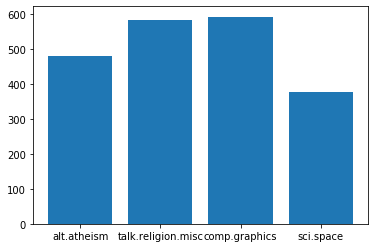

In [217]:
plt.bar(categories,target_df[0].value_counts().sort_index().values)

**TAKE AWAY** Data is loaded and the distribution of data is nearly balanced

### How do we prepare the data?

We need a way to convert the text data into a numerical representation.  This is done via Tokenization.

### Bag of words

Bags of words is a common model / approach for text processing.  Bags of words disregards the order / structure of the text but keeps the multiplicity.  This approach is commonly used in document classification where the frequency of each word is important in the classifying documents.  The bag of words approach is useful to convey which words were in the text and how often did each word get used.  

In [6]:
docs = [
    'John and Mary jumped in the pool.',
    'Tom went to John\'s house to use his pool this summer.',
    'The basketball players jumped.'
]

In [7]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [8]:
X = vectorizer.fit_transform(docs)
X

<3x17 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [9]:
print(X.todense())

[[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 1 1 0 1 2 1 1 1]
 [0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]]


In [10]:
vectorizer.get_feature_names()

['and',
 'basketball',
 'his',
 'house',
 'in',
 'john',
 'jumped',
 'mary',
 'players',
 'pool',
 'summer',
 'the',
 'this',
 'to',
 'tom',
 'use',
 'went']

## N-grams

N-grams are just sequences of words.  N represents the number of words in each sequence.  2-grams or bigrams are two word sequences, 3-grams or trigrams are three word sequences.  N-grams have historically been used in early language models to assign a probablity of the occurance of an N-gram.  

In [391]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))

In [392]:
X = bigram_vectorizer.fit_transform(docs)

In [393]:
bigram_vectorizer.get_feature_names()

['and mary',
 'basketball players',
 'his pool',
 'house to',
 'in the',
 'john and',
 'john house',
 'jumped in',
 'mary jumped',
 'players jumped',
 'pool this',
 'the basketball',
 'the pool',
 'this summer',
 'to john',
 'to use',
 'tom went',
 'use his',
 'went to']

more commonly when higher order n-grams are used the lower n-grams are also included.  So for our example:

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))

In [ ]:
X = bigram_vectorizer.fit_transform(docs)

In [ ]:
bigram_vectorizer.get_feature_names()

### What about words that are similar?

We can use Lemmatization or Stemming to group similar words together.  Lemmatization considers the word context and converts the word into the meanful base form (lemmas).  Stemming is a "poor man's version" of Lemmatization where only the stem of the word is kept and the remainder is discarded


In [303]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [305]:
#word_list = ['organize','organizes','organizing','organized']
word_list = ['fly', 'flies', 'flying']

In [306]:
print('Lemmatization')
[wnl.lemmatize(word) for word in word_list]

Lemmatization


['fly', 'fly', 'flying']

In [307]:
print('Stemming')
[porter.stem(word) for word in word_list]

Stemming


['fli', 'fli', 'fli']

**NOTE!** Stemming and Lemmatization are language dependent.  

### What about common words?

Common words in NLP are typically referred to 'Stop Words'.  These can be removed by using various stop word lists.  Also note that many tokenizers include options for stop word removal.

In [308]:
from sklearn.feature_extraction import stop_words

sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

## Modeling

We've shown some of the common preprocessing steps that are used in NLP applications - stop word removal, stemming, lemmitization, and tokenization.  Let's use our dataset to model the topics of the text.  

## Tokenization

To utilize text in machine learning we need to convert text (strings) into numbers.  There are numerous ways to do this.  The generic process of converting text into numbers is called Tokenization

A tokenizer will first split a given text in words (or part of words, punctuation symbols, etc.) usually called tokens. Then it will convert those tokens into numbers, to be able to build a tensor out of them and feed them to the model.

**NOTE:** If you plan on using a pretrained model, it’s important to use the associated pretrained tokenizer: it will split the text you give it in tokens the same way for the pretraining corpus, and it will use the same correspondence token to index (that we usually call a vocab) as during pretraining. This is similar to preprocessing on pretrained computer vision models.  

### Tokenization with Huggingface

In [12]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [74]:
tokenizer.model_max_length = 2000

In [218]:
tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_len=2000, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [13]:
print(newsgroups_train.data[8])


Their Hiten engineering-test mission spent a while in a highly eccentric
Earth orbit doing lunar flybys, and then was inserted into lunar orbit
using some very tricky gravity-assist-like maneuvering.  This meant that
it would crash on the Moon eventually, since there is no such thing as
a stable lunar orbit (as far as anyone knows), and I believe I recall
hearing recently that it was about to happen.


In [14]:
encoded_input = tokenizer(newsgroups_train.data[8])
print(encoded_input['input_ids'])

[101, 2397, 15375, 1424, 3752, 118, 2774, 2862, 2097, 170, 1229, 1107, 170, 3023, 20276, 2746, 8895, 1833, 15383, 4689, 2665, 1116, 117, 1105, 1173, 1108, 13137, 1154, 15383, 8895, 1606, 1199, 1304, 7959, 1183, 9926, 118, 6043, 118, 1176, 19844, 1158, 119, 1188, 2318, 1115, 1122, 1156, 5683, 1113, 1103, 5148, 2028, 117, 1290, 1175, 1110, 1185, 1216, 1645, 1112, 170, 6111, 15383, 8895, 113, 1112, 1677, 1112, 2256, 3520, 114, 117, 1105, 146, 2059, 146, 9148, 4510, 3055, 1115, 1122, 1108, 1164, 1106, 3333, 119, 102]


In [15]:
tokenizer.decode(encoded_input['input_ids'])

'[CLS] Their Hiten engineering - test mission spent a while in a highly eccentric Earth orbit doing lunar flybys, and then was inserted into lunar orbit using some very tricky gravity - assist - like maneuvering. This meant that it would crash on the Moon eventually, since there is no such thing as a stable lunar orbit ( as far as anyone knows ), and I believe I recall hearing recently that it was about to happen. [SEP]'

In [16]:
len(tokenizer.vocab)

28996

### Tokenization with Scikit-Learn

In [313]:
token_pattern = re.compile(r"(?u)\b\w\w+\b")
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if len(t) >= 2 and re.match("[a-z].*",t) 
                and re.match(token_pattern, t)]

In [334]:
%%time
vocab_size = 2000
print('Tokenizing and counting, this may take a few minutes...')
vectorizer = CountVectorizer(input='content', analyzer='word', stop_words='english',
                             tokenizer=LemmaTokenizer(), max_features=vocab_size, max_df=0.95, min_df=2)
#vectorizer = CountVectorizer(stop_words='english',max_features=vocab_size, min_df=2)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vocab = np.array(vectorizer.get_feature_names())

Tokenizing and counting, this may take a few minutes...
CPU times: user 7.2 s, sys: 0 ns, total: 7.2 s
Wall time: 7.19 s


In [335]:
vectors.shape #

(2034, 2000)

In [336]:
with open('vocab.txt', 'w') as f:
    for v in vocab:
        f.write(v+'\n')

In [337]:
vocab.shape

(2000,)

In [338]:
vocab[100:120]

array(['archive-name', 'area', 'argue', 'argument', 'ariane',
       'arithmetic', 'arm', 'army', 'array', 'art', 'article', 'ascii',
       'aside', 'ask', 'asked', 'asking', 'aspect', 'assembly',
       'assertion', 'assist'], dtype='<U17')

## Non Negative Factorization (NMF)

Similar factorization technique as singualr value decomposition (SVD) but instead of orthonormal, the factors are constrained to be non-negative.  Most consider NMF to be more interpretable than SVD.  

In [339]:
m,n=vectors.shape
d=4  # num topics

In [340]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [341]:
H1

array([[0.00000000e+00, 2.33796219e-01, 6.28239986e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.28996576e-04],
       [1.09611259e-01, 6.75114209e-02, 0.00000000e+00, ...,
        2.70023897e-02, 4.23334157e-02, 0.00000000e+00],
       [6.19737942e-02, 2.18224097e-01, 0.00000000e+00, ...,
        2.13591256e-01, 5.63505050e-02, 1.35730824e-01],
       [1.77196875e-02, 2.10536258e-01, 6.69453375e-01, ...,
        6.42269509e-03, 1.49264527e-02, 1.94308389e-02]])

In [342]:
num_top_words=8

def show_topics(a,vocab):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [343]:
show_topics(H1,vocab)

['jpeg image file gif format color version program',
 'image data available file package graphic ftp format',
 'wa jesus god atheist ha people matthew doe',
 'space launch satellite wa commercial year market ha']

### TF-IDF
Topic Frequency-Inverse Document Frequency (TF-IDF) is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

In [344]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english', min_df=2)
vectorizer_tfidf = TfidfVectorizer(input='content', analyzer='word', stop_words='english',
                             tokenizer=LemmaTokenizer(), max_df=0.95, min_df=2)
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)
vocab_tfidf = np.array(vectorizer_tfidf.get_feature_names())

In [345]:
d=4  # num topics
clf = decomposition.NMF(n_components=d, random_state=1)
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [346]:
show_topics(H1,vocab_tfidf)

['wa think people just did like ha say',
 'file image thanks format program graphic know color',
 'space launch nasa satellite orbit shuttle mission moon',
 'god jesus christian bible believe belief doe atheism']

## SageMaker NTM

In [347]:
import io, boto3
import sagemaker
import sagemaker.amazon.common as smac

In [348]:
vectors = vectors.astype('float32')

In [349]:
vectors

<2034x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 73608 stored elements in Compressed Sparse Row format>

In [350]:
buf = io.BytesIO()
smac.write_spmatrix_to_sparse_tensor(buf, vectors, None)
buf.seek(0)

0

In [351]:
sess = sagemaker.Session()
bucket = sess.default_bucket()
prefix = 'topic-modeling'
train_key = 'usenet.protobuf'
obj = f'{prefix}/{train_key}'

In [352]:
s3 = boto3.resource('s3')
s3.Bucket(bucket).Object(obj).upload_fileobj(buf)
s3_train_path = f's3://{bucket}/{obj}'
s3_output = f's3://{bucket}/{prefix}/output/'

In [268]:
s3_aux_path = sess.upload_data(path='vocab.txt',bucket=bucket,key_prefix=prefix)

In [269]:
s3_aux_path

's3://sagemaker-us-east-1-431615879134/topic-modeling/vocab.txt'

In [270]:
print(s3_train_path)
print(s3_output)
print(s3_aux_path)

s3://sagemaker-us-east-1-431615879134/topic-modeling/usenet.protobuf
s3://sagemaker-us-east-1-431615879134/topic-modeling/output/
s3://sagemaker-us-east-1-431615879134/topic-modeling/vocab.txt


In [271]:
ntm_container = sagemaker.image_uris.retrieve('ntm','us-east-1')

In [272]:
ntm = sagemaker.estimator.Estimator(ntm_container,
                                   role = sagemaker.get_execution_role(),
                                   instance_count = 1,
                                   instance_type = 'ml.p3.2xlarge',
                                   output_path = s3_output,
                                   sagemaker_session=sess)

In [273]:
ntm.set_hyperparameters(num_topics=5, 
                        feature_dim=len(vocab),
                        optimizer='adam', 
                        mini_batch_size=256,
                        epochs=100,
                        num_patience_epochs=10)


In [274]:
ntm.fit(inputs={'train': s3_train_path,
                'auxiliary': s3_aux_path})

2021-01-11 23:17:06 Starting - Starting the training job...
2021-01-11 23:17:30 Starting - Launching requested ML instancesProfilerReport-1610407026: InProgress
......
2021-01-11 23:18:31 Starting - Preparing the instances for training......
2021-01-11 23:19:33 Downloading - Downloading input data...
2021-01-11 23:19:52 Training - Downloading the training image..
2021-01-11 23:20:33 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python2.7/site-packages/pandas/util/nosetester.py:13: DeprecationWarning: Importing from numpy.testing.nosetester is deprecated, import from numpy.testing instead.
  from numpy.testing import nosetester
[01/11/2021 23:20:21 INFO 140226321442624] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'num_patience_epochs': u'3', u'clip_gradient': u'Inf', u'encoder_layers': u'auto

### Deploy

In [277]:
ntm_predictor = ntm.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge',serializer = sagemaker.serializers.IdentitySerializer('application/x-recordio-protobuf'))

-----------------!

In [380]:
test_vectors = vectorizer.transform(newsgroups_test.data[:10])

In [382]:
[print(newsgroups_test.target_names[newsgroups_test.target[i]],'\n\n',newsgroups_test.data[i],'\n') for i in range(9)]

sci.space 

 TRry the SKywatch project in  Arizona. 

comp.graphics 

 The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collection is 
 available. 

comp.graphics 

 Hi there,

I am here looking for some help.

My friend is a interior decor designer. He is from Thailand. He is
trying to find some graphics software on PC. Any suggestion on which
software to buy,where to buy and how much it costs ? He likes the most
sophisticated 
software(the more features it has,the better) 

comp.graphics 

 RFD
                          Request For Discussion
                                for the
                          OPEN  TELEMATIC GROUP

                                  OTG

I have proposed the forming of a consortium/task force for the
promotion of NAPLPS/JPEG, FIF to openly discuss ways, method,
procedures,algorythms, applications, implementation, extensions of
NAPLPS/JPEG standards.  These standards should facilitate the creation
of

[None, None, None, None, None, None, None, None, None]

In [384]:
buf = io.BytesIO()
smac.write_spmatrix_to_sparse_tensor(buf, test_vectors, None)
buf.seek(0)

0

In [385]:
response = ntm_predictor.predict(buf)

In [386]:
response = json.loads(response.decode('utf-8'))

In [387]:
predictions = np.array([prediction['topic_weights'] for prediction in response['predictions']])
print(predictions)

[[0.21096699 0.18487486 0.21297348 0.1556932  0.23549148]
 [0.1494506  0.54590786 0.14265324 0.05187792 0.11011035]
 [0.13456063 0.57404399 0.13980454 0.03729982 0.11429098]
 [0.1329252  0.48300558 0.1318415  0.15262295 0.09960476]
 [0.14594652 0.5330019  0.14863576 0.04931984 0.12309601]
 [0.1346754  0.53007102 0.11470658 0.14414591 0.07640111]
 [0.19331904 0.16369125 0.19723308 0.22267568 0.22308101]
 [0.19968891 0.18436807 0.20451064 0.19965564 0.21177676]
 [0.09354258 0.07975934 0.0996239  0.6138199  0.11325429]
 [0.19406945 0.1759121  0.19490488 0.23710455 0.19800907]]


Text(0.5, 0, 'Topic ID')

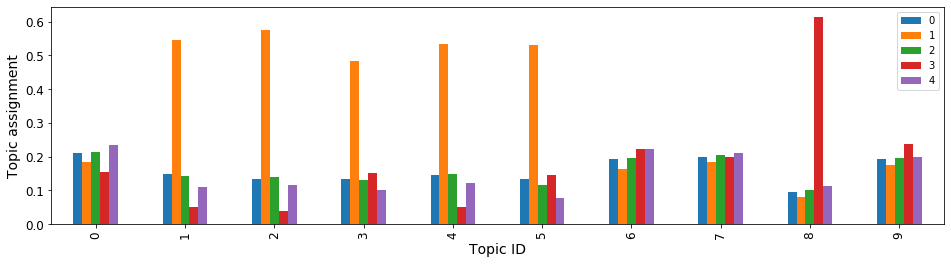

In [388]:
fs = 12
df=pd.DataFrame(predictions)
df.plot(kind='bar', figsize=(16,4), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

### Clean Up

In [ ]:
ntm_predictor.delete_endpoint()

## References

* Speech and Language Processing, by Dan Jurafsky and James H. Martin (free PDF)
* Natural Language Processing with PyTorch by Brian McMahan and Delip Rao 
* Fastai NLP Course
* Sebastian Ruder's blog
* Stephen Merity blog
* Rachael Tatman blog
